## The reader for data from beamtime ##

In [5]:
import os
import pandas as pd

def search_files_by_keyword(directory, keywords, file_format):
    # Get the list of files in the specified directory
    file_names = os.listdir(directory)
    
      
    # Search for the keyword in each file name
    matching_files = [file #return file
                      for file in file_names # listing files in directory
                      if all(keyword in file for keyword in keywords) and file.endswith(file_format)# searching for all keywords
                      # ключевое слово ищется в каждом файле из списка, прежде чем перейти к новому файлу в имени этого проверяются все ключевые слова
                    # keyword is searched for in each file in the list, all keywords are checked in the name of this file before moving to a new file
                     ] 

    return matching_files


#directory_path = 'D:\2022-07-08_to_2022-07-11_ESRF_ID02\sorted'
directory_path = 'D:\ESRF\sorted'
search_keyword = input('Tell me search parameters:').split(' ')
desired_format = '.dat'  # Specify the desired file format, e.g., '.txt', '.pdf', '.jpg' '.opju'
                      
matching_files = search_files_by_keyword(directory_path, search_keyword, desired_format)

if matching_files:
    print(f"Files containing the keyword '{search_keyword}' with format '{desired_format}':")
    for file in matching_files:
        print(file)
    # Gathering all file names into a single list
    all_file_names = matching_files
    print("\nAll file names in a single list:")
    print(all_file_names)    
        
else:
    print(f"No files found with the keyword '{search_keyword}' and format '{desired_format}'.")
    


Files containing the keyword '['run04_3B_egy']' with format '.dat':
run04_3B_egy-13224.dat
run04_3B_egy-13374.dat
run04_3B_egy-13424.dat
run04_3B_egy-13454.dat
run04_3B_egy-13464.dat
run04_3B_egy-13469.dat
run04_3B_egy-13474.dat
run04_3B_egy-13494.dat
run04_3B_egy-13524.dat

All file names in a single list:
['run04_3B_egy-13224.dat', 'run04_3B_egy-13374.dat', 'run04_3B_egy-13424.dat', 'run04_3B_egy-13454.dat', 'run04_3B_egy-13464.dat', 'run04_3B_egy-13469.dat', 'run04_3B_egy-13474.dat', 'run04_3B_egy-13494.dat', 'run04_3B_egy-13524.dat']


In [ ]:
table

In [6]:
def read_files_and_create_tables(file_names):
    # Dictionary to store tables with file names as keys
    tables = {}

    for file_name in file_names:
        try:
            # Assuming the files are in CSV format, adjust as needed
            table = pd.read_csv(f'D:\ESRF\sorted\{file_name}', delimiter = ' ', header=None, skiprows=1)
            
            # Use the file name (without extension) as the key for the table
            key = file_name.rsplit('.', 1)[0]
            
            # Add the table to the dictionary
            tables[key] = table
        except Exception as e:
            print(f"Error reading file '{file_name}': {e}")

    return tables


# Call the function to read files and create tables
resulting_tables = read_files_and_create_tables(all_file_names)

# Now 'resulting_tables' is a dictionary where keys are file names and values are Pandas DataFrames containing the data from each file
# You can further manipulate or analyze the data in each table as needed
for key, table in resulting_tables.items():
    print(f"Table for file '{key}':")
    print(table)
    #print(tb.head(5))
    print("\n")
   

Table for file 'run04_3B_egy-13224':
             0           1         2   3
0     0.066044  187.313000  0.208034 NaN
1     0.070122  156.174000  0.129693 NaN
2     0.074201  128.811000  0.100693 NaN
3     0.078279  113.018000  0.074881 NaN
4     0.082358   98.037000  0.058096 NaN
5     0.086436   82.261200  0.048192 NaN
6     0.090514   69.337700  0.041030 NaN
7     0.094593   59.246900  0.035686 NaN
8     0.098671   51.080700  0.031421 NaN
9     0.102750   44.041800  0.027837 NaN
10    0.106828   38.004200  0.024847 NaN
11    0.110907   33.066300  0.022299 NaN
12    0.114985   28.949800  0.020138 NaN
13    0.119064   25.338900  0.018257 NaN
14    0.123142   22.335400  0.016625 NaN
15    0.127221   19.721900  0.015222 NaN
16    0.131299   17.504400  0.013968 NaN
17    0.135377   15.552800  0.012822 NaN
18    0.139456   13.892200  0.011857 NaN
19    0.143534   12.503000  0.010993 NaN
20    0.147613   11.320800  0.010254 NaN
21    0.151691   10.228700  0.009558 NaN
22    0.155770    9.

In [33]:
print(resulting_tables['run04_3B_00185'])

             q[nm-1]  \
0.067392  174.744000   
0.071554  145.608000   
0.075715  119.976000   
0.079877  105.073000   
0.084039   91.156000   
0.088201   76.864500   
0.092362   65.109400   
0.096524   55.368100   
0.100686   47.316300   
0.104847   40.774100   
0.109009   35.347400   
0.113171   30.705600   
0.117332   26.864400   
0.121494   23.594900   
0.125656   20.834000   
0.129818   18.325100   
0.133979   16.222200   
0.138141   14.451200   
0.142303   12.927300   
0.146464   11.670800   
0.150626   10.545900   
0.154788    9.560710   
0.158950    8.648340   
0.163111    7.860840   
0.167273    7.149000   
0.171435    6.540040   
0.175596    5.976040   
0.179758    5.455490   
0.183920    4.996760   
0.188081    4.609730   
...              ...   
7.000790    0.001926   
7.004950    0.001748   
7.009110    0.002198   
7.013280    0.001423   
7.017440    0.001324   
7.021600    0.001709   
7.025760    0.001668   
7.029920    0.003051   
7.034080    0.002484   
7.038250    0.00

In [4]:
for key, table in resulting_tables.items():
    table.columns #The column labels of the DataFrame.

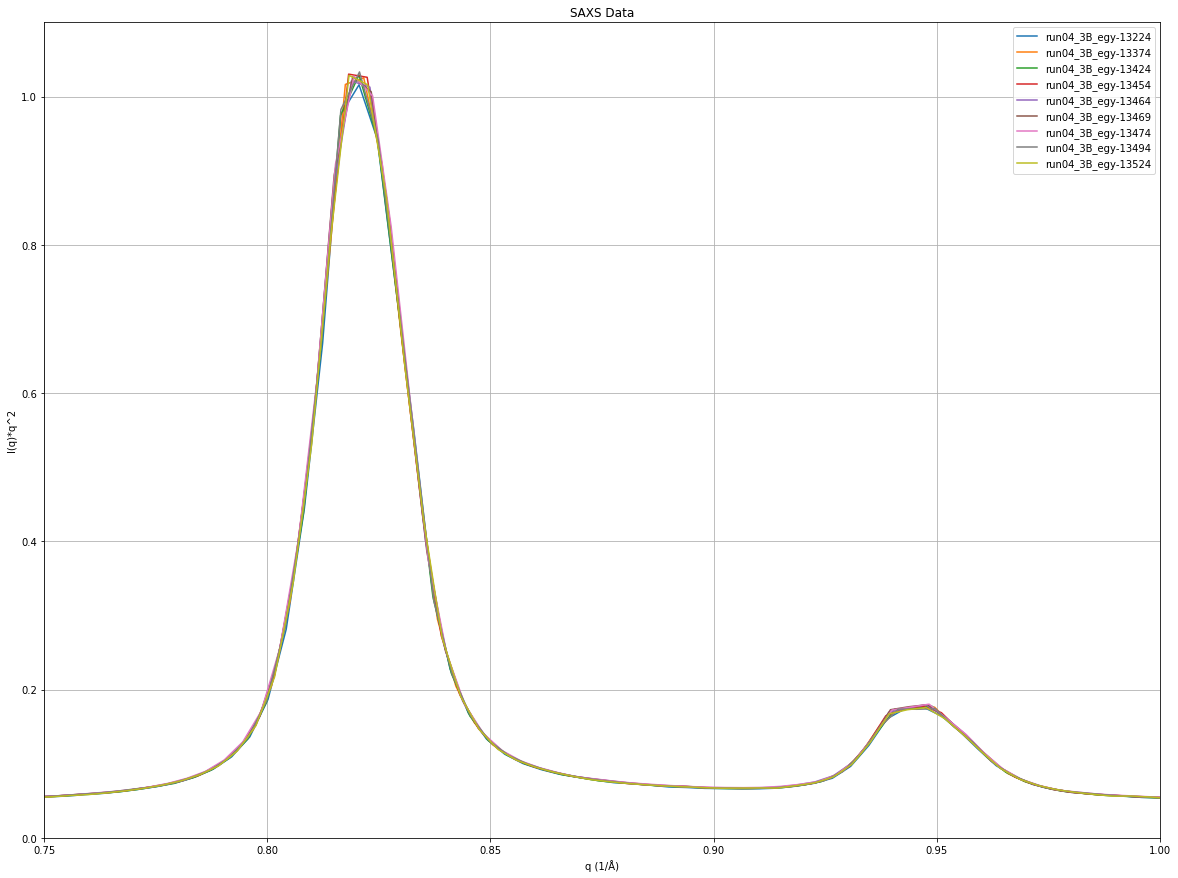

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def read_saxs_dat(file_path):
    data = np.loadtxt(file_path, skiprows=1)  # Assuming a simple text file with numerical data
    q, intensity = data[:, 0], data[:, 1]
    intensity = intensity * q * q
    return q, intensity


def plot_saxs_data(q, intensity):
    plt.plot(q, intensity, label=f'{key}')

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed    
    
for key, table in resulting_tables.items():
    file_path = f'D:\ESRF\sorted\{key}.dat'  # Replace with your file path
    q, intensity = read_saxs_dat(file_path)
    plot_saxs_data(q, intensity)
    
plt.xlabel('q (1/Å)')
plt.ylabel('I(q)*q^2')
plt.title('SAXS Data')
plt.grid()
plt.legend()
#plt.xscale('log')
plt.xlim(0.75, 1) # Set X-axis limits to the range from 0.5 to 1
plt.ylim(0, 1.1) # Set X-axis limits to the range from 0.5 to 2
plt.savefig(f'{search_keyword[0]}.png')
plt.show()

## function gaussian fit and peak search ##

In [9]:
from scipy.optimize import curve_fit

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

def fit_gaussian(x, y, q_range):
    # Filter the data within the specified q_range
    mask = (x >= q_range[0]) & (x <= q_range[1])
    x_fit, y_fit = x[mask], y[mask]

    # Initial guess for the parameters
    initial_params = [np.max(y_fit), x_fit[np.argmax(y_fit)], 0.1]

    # Perform the curve fitting
    params, covariance = curve_fit(gaussian, x_fit, y_fit, p0=initial_params)

    # Extract the fitted parameters
    amplitude, mean, stddev = params

    # Fitted curve
    fit_curve = gaussian(x_fit, amplitude, mean, stddev)

    return mean, fit_curve, x_fit



### first peak ###

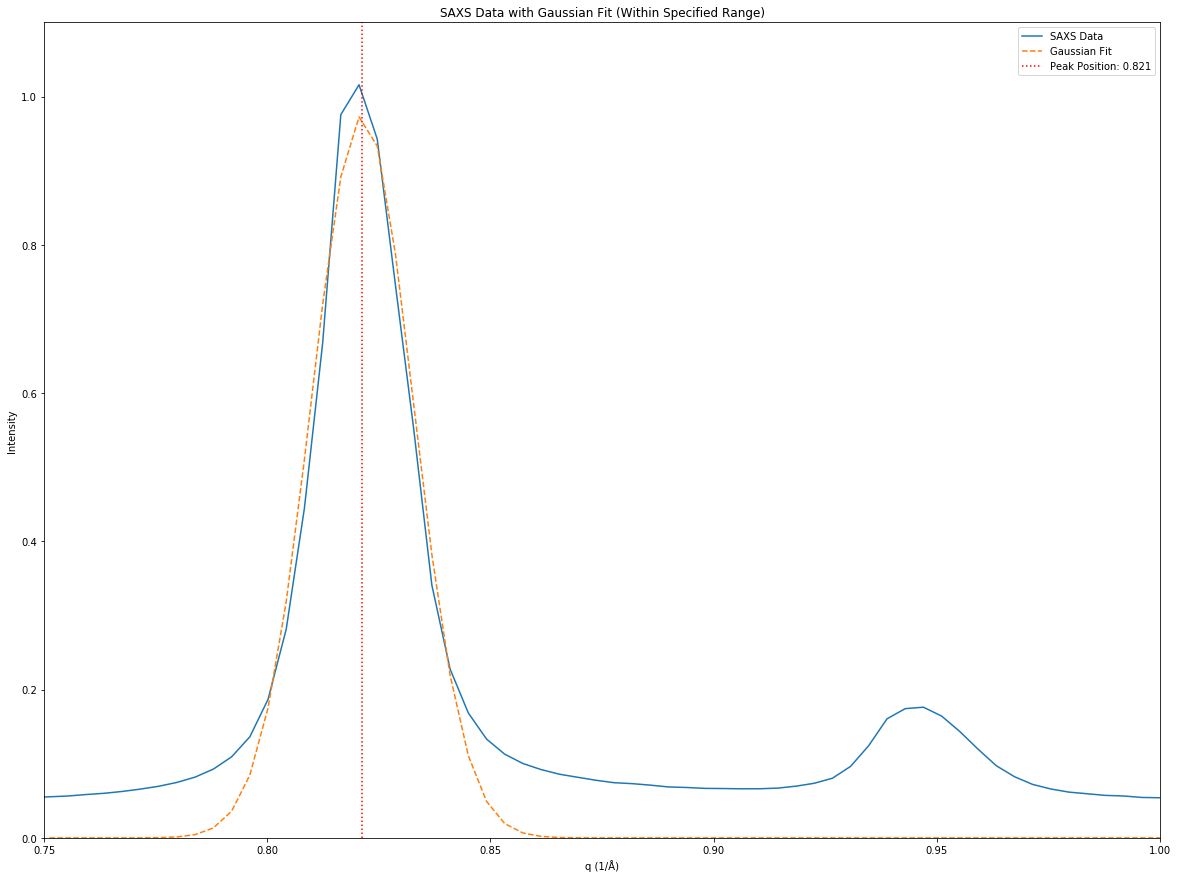

Peak Position: 0.821


In [13]:
# Example usage
file_path = 'D:\\ESRF\\sorted\\run04_3B_egy-13224.dat'  # Replace with your file path
q, intensity = read_saxs_dat(file_path)

# Set the range for fitting
q_range_for_fit = (0.75, 9)

# Perform Gaussian fit within the specified q_range
peak_position, fit_curve, x_fit = fit_gaussian(q, intensity, q_range_for_fit)

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed    

# Plot the original data and the fitted curve within the specified range
plt.plot(q, intensity, label='SAXS Data')
plt.plot(x_fit, fit_curve, label='Gaussian Fit', linestyle='--')
plt.axvline(peak_position, color='red', linestyle=':', label=f'Peak Position: {peak_position:.3f}')
plt.xlabel('q (1/Å)')
plt.ylabel('Intensity')
plt.title('SAXS Data with Gaussian Fit (Within Specified Range)')
plt.xlim(0.75, 1) # Set X-axis limits to the range from 0.5 to 1
plt.ylim(0, 1.1) # Set X-axis limits to the range from 0.5 to 2
plt.legend()
plt.show()

print(f"Peak Position: {peak_position:.3f}")

 ### makes a list of first peak positions for pool of files ###

In [14]:
positions_for_file = []
positions_for_file.append(['energy', 'first peak'])

for key, table in resulting_tables.items():
    file_path = f'D:\ESRF\sorted\{key}.dat'  # Replace with your file path
    q, intensity = read_saxs_dat(file_path)
    plot_saxs_data(q, intensity)
    peak_position, fit_curve, x_fit = fit_gaussian(q, intensity, q_range_for_fit)
    name = float(key[-5:])
    positions_for_file.append([name, peak_position])
#positions_for_file = np.array(positions_for_file)
positions_for_file = pd.DataFrame(positions_for_file[1:], columns=positions_for_file[0])
print (positions_for_file)


    energy  first peak
0  13224.0    0.821280
1  13374.0    0.821159
2  13424.0    0.821147
3  13454.0    0.821161
4  13464.0    0.821158
5  13469.0    0.821161
6  13474.0    0.821188
7  13494.0    0.821174
8  13524.0    0.821236


### second peak ###

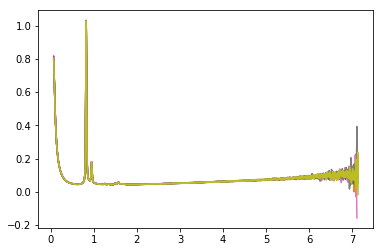

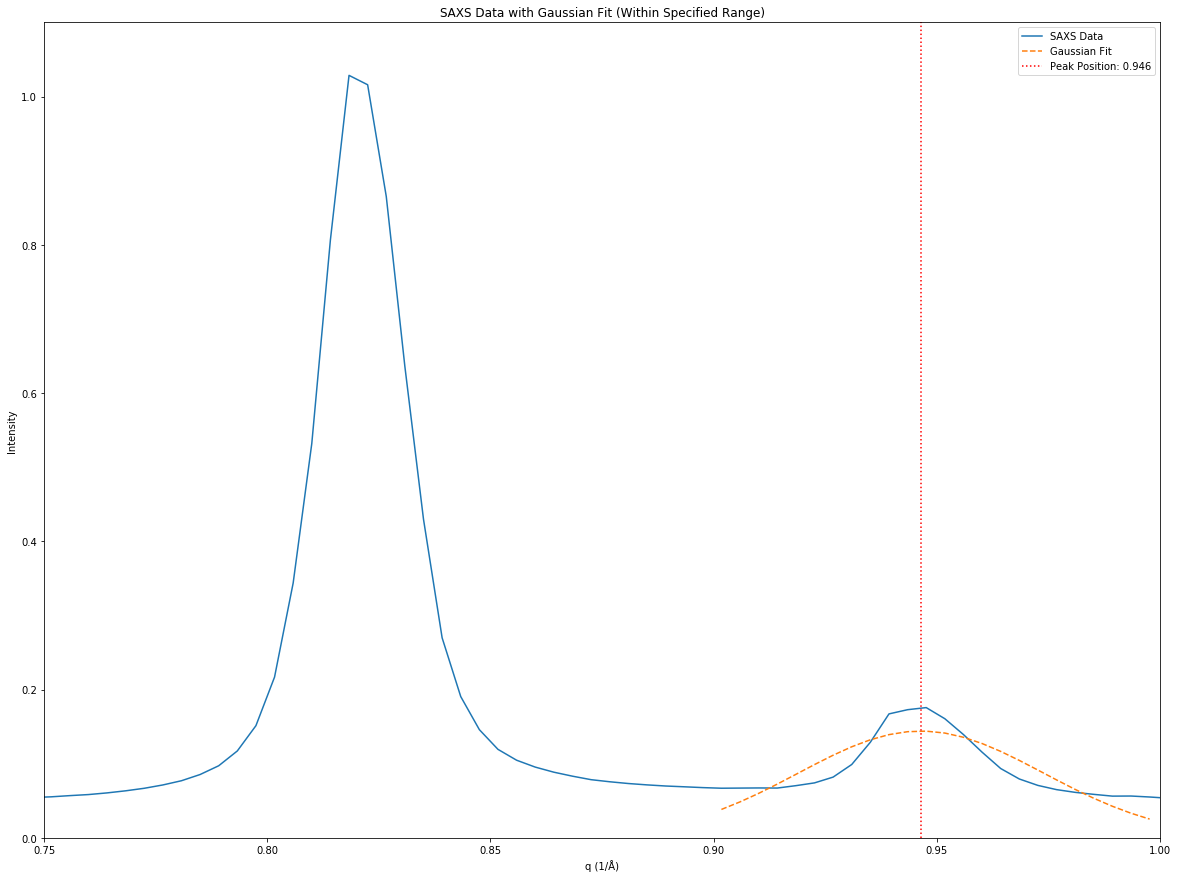

Peak Position: 0.946


In [15]:
# Set the range for fitting
q_range_for_fit = (0.9, 1)

# Perform Gaussian fit within the specified q_range
peak_position, fit_curve, x_fit = fit_gaussian(q, intensity, q_range_for_fit)

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed    

# Plot the original data and the fitted curve within the specified range
plt.plot(q, intensity, label='SAXS Data')
plt.plot(x_fit, fit_curve, label='Gaussian Fit', linestyle='--')
plt.axvline(peak_position, color='red', linestyle=':', label=f'Peak Position: {peak_position:.3f}')
plt.xlabel('q (1/Å)')
plt.ylabel('Intensity')
plt.title('SAXS Data with Gaussian Fit (Within Specified Range)')
plt.xlim(0.75, 1) # Set X-axis limits to the range from 0.5 to 1
plt.ylim(0, 1.1) # Set X-axis limits to the range from 0.5 to 2
plt.legend()
plt.show()

print(f"Peak Position: {peak_position:.3f}")

 ### makes a list of second peak positions for pool of files ###

In [16]:
positions_for_file_2 = []
positions_for_file_2.append(['second peak'])

for key, table in resulting_tables.items():
    file_path = f'D:\ESRF\sorted\{key}.dat'  # Replace with your file path
    q, intensity = read_saxs_dat(file_path)
    plot_saxs_data(q, intensity)
    peak_position, fit_curve, x_fit = fit_gaussian(q, intensity, q_range_for_fit)
    positions_for_file_2.append([peak_position])
#positions_for_file = np.array(positions_for_file)
positions_for_file_2 = pd.DataFrame(positions_for_file_2[1:], columns=positions_for_file_2[0])
print (positions_for_file_2)

   second peak
0     0.946436
1     0.946771
2     0.946675
3     0.946259
4     0.946352
5     0.946511
6     0.946570
7     0.946902
8     0.946436


In [17]:
positions_for_file = pd.concat([positions_for_file, positions_for_file_2], axis=1)
print (positions_for_file)

    energy  first peak  second peak
0  13224.0    0.821280     0.946436
1  13374.0    0.821159     0.946771
2  13424.0    0.821147     0.946675
3  13454.0    0.821161     0.946259
4  13464.0    0.821158     0.946352
5  13469.0    0.821161     0.946511
6  13474.0    0.821188     0.946570
7  13494.0    0.821174     0.946902
8  13524.0    0.821236     0.946436


### first and secont peaks plots ###

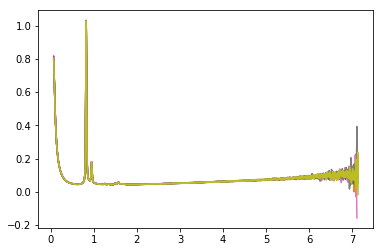

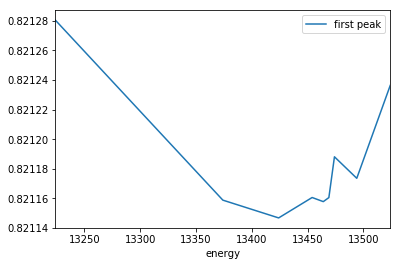

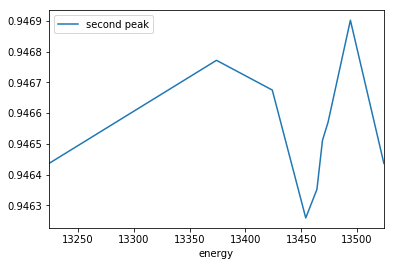

In [18]:
positions_for_file.plot(x = "energy" ,y = "first peak")
positions_for_file.plot(x = "energy" ,y = "second peak")
plt.show()



## lorenzian ##

In [8]:
# Lorentzian fitting model
def lorentzian(x, amplitude, center, width, y_0):
    return amplitude / ((x - center)**2 + (0.5 * width)**2)+y_0

# Updated fitting function for Lorentzian
def fit_lorentzian(x, y, q_range):
    # Filter the data within the specified q_range
    mask = (x >= q_range[0]) & (x <= q_range[1])
    x_fit, y_fit = x[mask], y[mask]

    # Initial guess for the parameters
    initial_params = [np.max(y_fit), x_fit[np.argmax(y_fit)], 0.1]

    # Perform the curve fitting
    params, covariance = curve_fit(lorentzian, x_fit, y_fit, p0=initial_params)

    # Extract the fitted parameters
    amplitude, center, width = params

    # Fitted curve
    fit_curve = lorentzian(x_fit, amplitude, center, width)

    return center, fit_curve, x_fit


In [10]:
# Lorentzian fitting model with amplitude, center, width, and y_offset
def lorentzian_with_offset(x, amplitude, center, width, y_offset):
    return amplitude / ((x - center)**2 + (0.5 * width)**2) + y_offset

# Updated fitting function for Lorentzian with offset
def fit_lorentzian(x, y, q_range):
    # Filter the data within the specified q_range
    mask = (x >= q_range[0]) & (x <= q_range[1])
    x_fit, y_fit = x[mask], y[mask]

    # Initial guess for the parameters, including y_offset
    initial_params = [np.max(y_fit), x_fit[np.argmax(y_fit)], 0.1, np.min(y_fit)]

    # Perform the curve fitting
    params, covariance = curve_fit(lorentzian_with_offset, x_fit, y_fit, p0=initial_params)

    # Extract the fitted parameters
    amplitude, center, width, y_offset = params

    # Fitted curve
    fit_curve = lorentzian_with_offset(x_fit, amplitude, center, width, y_offset)

    return center, fit_curve, x_fit

### First peak ###

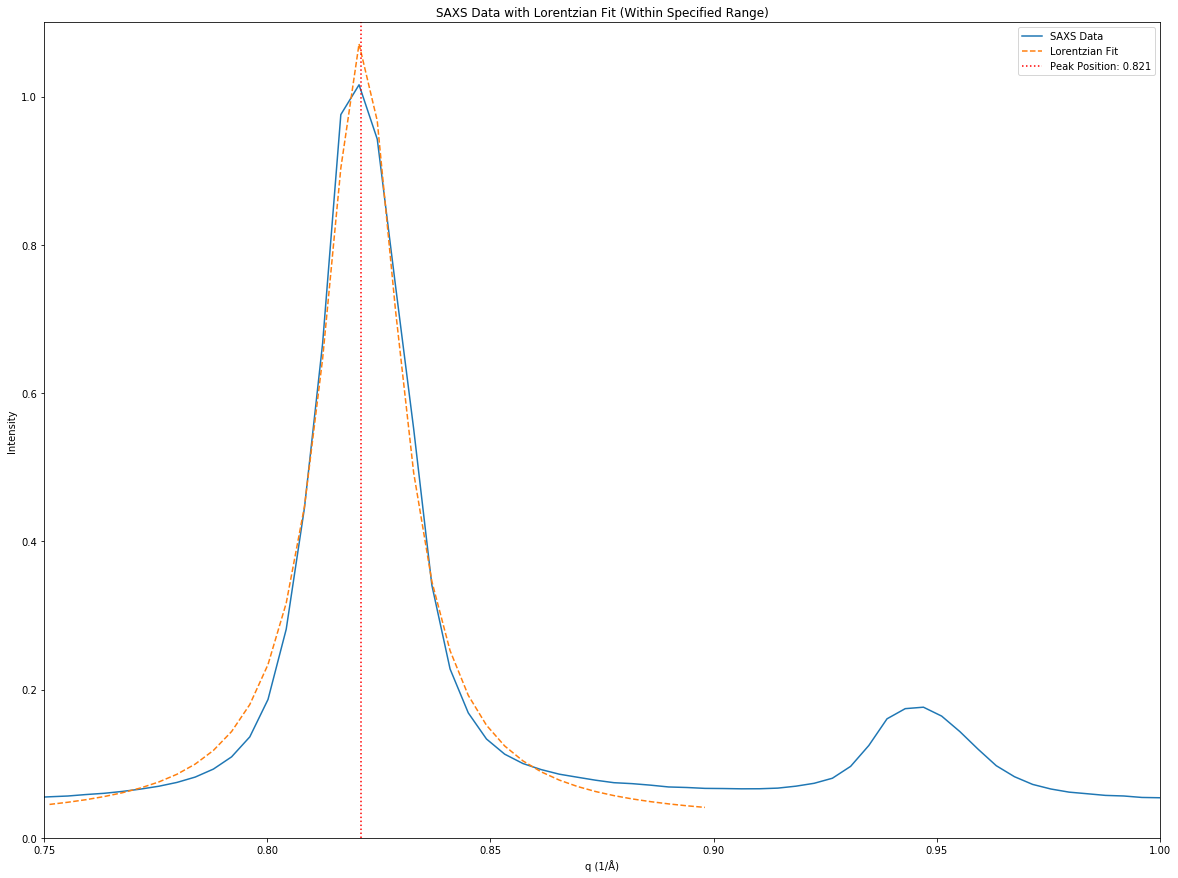

Peak Position: 0.821


In [12]:
# Example usage with Lorentzian fit
file_path = 'D:\\ESRF\\sorted\\run04_3B_egy-13224.dat'  # Replace with your file path
q, intensity = read_saxs_dat(file_path)

# Set the range for fitting
q_range_for_fit = (0.75, 0.9)

# Perform Lorentzian fit within the specified q_range
peak_position, fit_curve, x_fit = fit_lorentzian(q, intensity, q_range_for_fit)

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed    

# Plot the original data and the fitted curve within the specified range
plt.plot(q, intensity, label='SAXS Data')
plt.plot(x_fit, fit_curve, label='Lorentzian Fit', linestyle='--')
plt.axvline(peak_position, color='red', linestyle=':', label=f'Peak Position: {peak_position:.3f}')
plt.xlabel('q (1/Å)')
plt.ylabel('Intensity')
plt.title('SAXS Data with Lorentzian Fit (Within Specified Range)')
plt.xlim(0.75, 1)  # Set X-axis limits to the range from 0.75 to 9
plt.ylim(0, 1.1)  # Set Y-axis limits based on your data range
plt.legend()
plt.show()

print(f"Peak Position: {peak_position:.3f}")

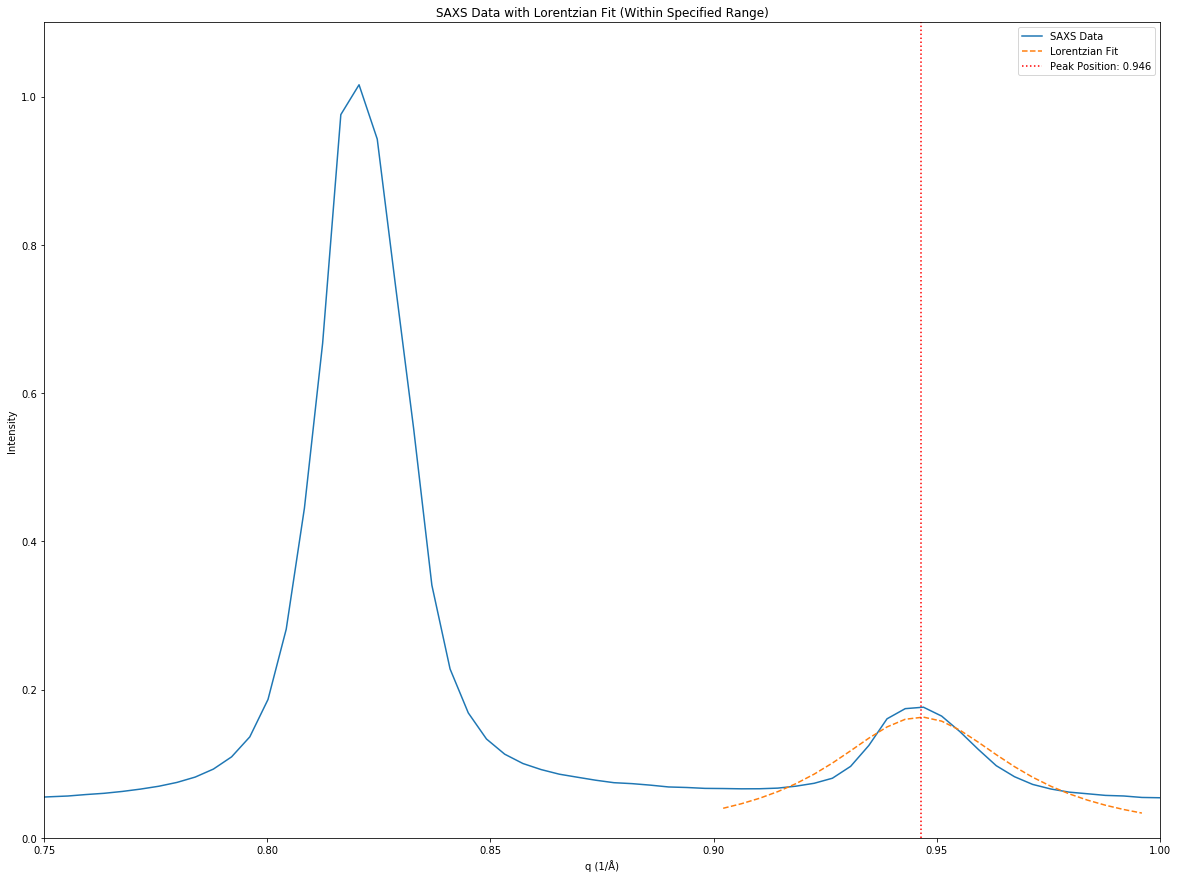

Peak Position: 0.946


In [32]:
# Example usage with Lorentzian fit
file_path = 'D:\\ESRF\\sorted\\run04_3B_egy-13224.dat'  # Replace with your file path
q, intensity = read_saxs_dat(file_path)

# Set the range for fitting
q_range_for_fit = (0.9, 1)

# Perform Lorentzian fit within the specified q_range
peak_position, fit_curve, x_fit = fit_lorentzian(q, intensity, q_range_for_fit)

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed    

# Plot the original data and the fitted curve within the specified range
plt.plot(q, intensity, label='SAXS Data')
plt.plot(x_fit, fit_curve, label='Lorentzian Fit', linestyle='--')
plt.axvline(peak_position, color='red', linestyle=':', label=f'Peak Position: {peak_position:.3f}')
plt.xlabel('q (1/Å)')
plt.ylabel('Intensity')
plt.title('SAXS Data with Lorentzian Fit (Within Specified Range)')
plt.xlim(0.75, 1)  # Set X-axis limits to the range from 0.75 to 9
plt.ylim(0, 1.1)  # Set Y-axis limits based on your data range
plt.legend()
plt.show()

print(f"Peak Position: {peak_position:.3f}")

### The Voigt profile is a convolution of a Gaussian and a Lorentzian profile. ###

-0.5056907364078354 0.8211674152940263 0.029192857584592922


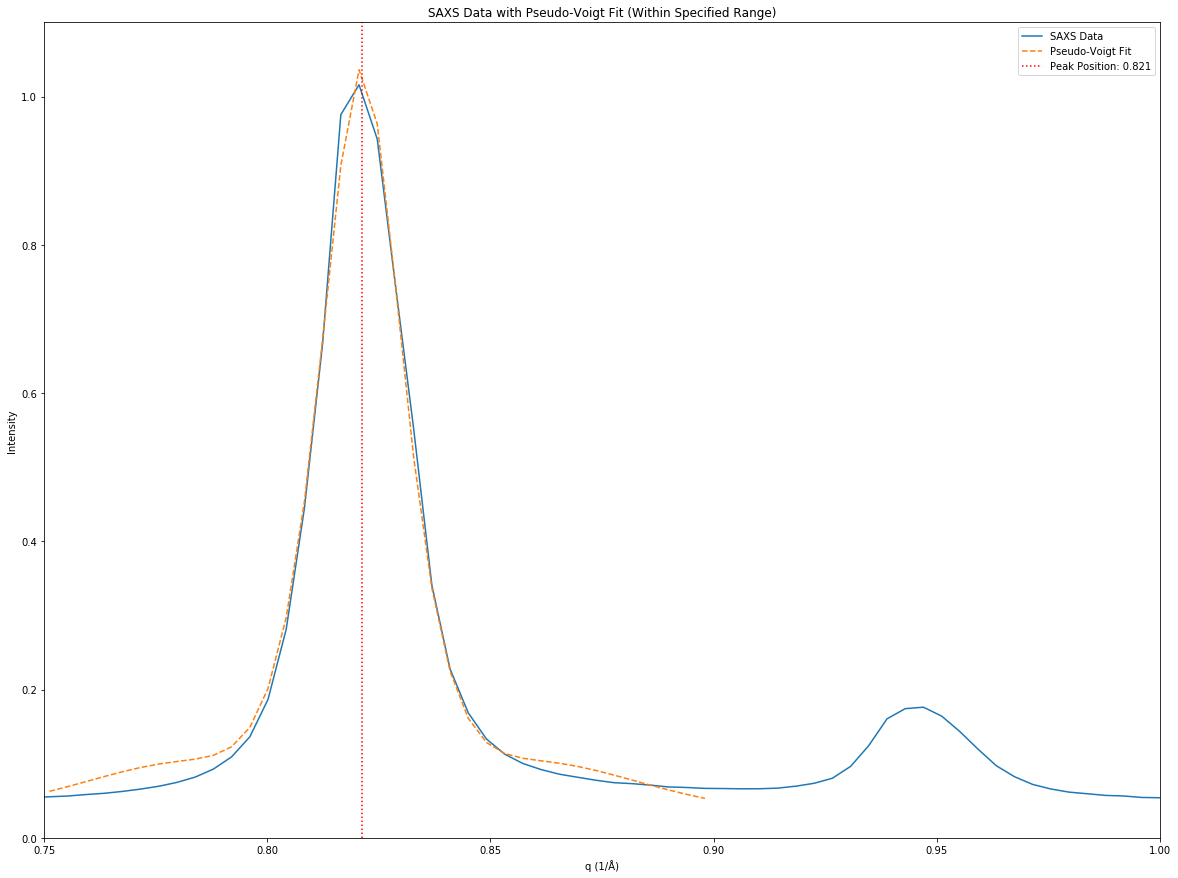

Peak Position: 0.821


In [58]:
from scipy.special import voigt_profile

# Pseudo-Voigt fitting model
def pseudo_voigt(x, amplitude, center, sigma, fraction):
    gaussian_component = (1 - fraction) * np.exp(-((x - center) / sigma)**2)
    lorentzian_component = fraction / ((x - center)**2 + (0.5 * sigma)**2)
    return amplitude * (gaussian_component + lorentzian_component)

# Updated fitting function for Pseudo-Voigt
def fit_pseudo_voigt(x, y, q_range):
    # Filter the data within the specified q_range
    mask = (x >= q_range[0]) & (x <= q_range[1])
    x_fit, y_fit = x[mask], y[mask]

    # Initial guess for the parameters
    initial_params = [np.max(y_fit), x_fit[np.argmax(y_fit)], 0.1, 0.5]

    # Perform the curve fitting
    params, covariance = curve_fit(pseudo_voigt, x_fit, y_fit, p0=initial_params)

    # Extract the fitted parameters
    amplitude, center, sigma, fraction = params

    # Fitted curve
    fit_curve = pseudo_voigt(x_fit, amplitude, center, sigma, fraction)
    print(amplitude, center, sigma)

    return center, fit_curve, x_fit

# Example usage with Pseudo-Voigt fit
file_path = 'D:\\ESRF\\sorted\\run04_3B_egy-13224.dat'  # Replace with your file path
q, intensity = read_saxs_dat(file_path)

# Set the range for fitting
q_range_for_fit = (0.75, 0.9)

# Perform Pseudo-Voigt fit within the specified q_range
peak_position, fit_curve, x_fit = fit_pseudo_voigt(q, intensity, q_range_for_fit)

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed    

# Plot the original data and the fitted curve within the specified range
plt.plot(q, intensity, label='SAXS Data')
plt.plot(x_fit, fit_curve, label='Pseudo-Voigt Fit', linestyle='--')
plt.axvline(peak_position, color='red', linestyle=':', label=f'Peak Position: {peak_position:.3f}')
plt.xlabel('q (1/Å)')
plt.ylabel('Intensity')
plt.title('SAXS Data with Pseudo-Voigt Fit (Within Specified Range)')
plt.xlim(0.75, 1)  # Set X-axis limits to the range from 0.75 to 9
plt.ylim(0, 1.1)  # Set Y-axis limits based on your data range
plt.legend()
plt.show()

print(f"Peak Position: {peak_position:.3f}")

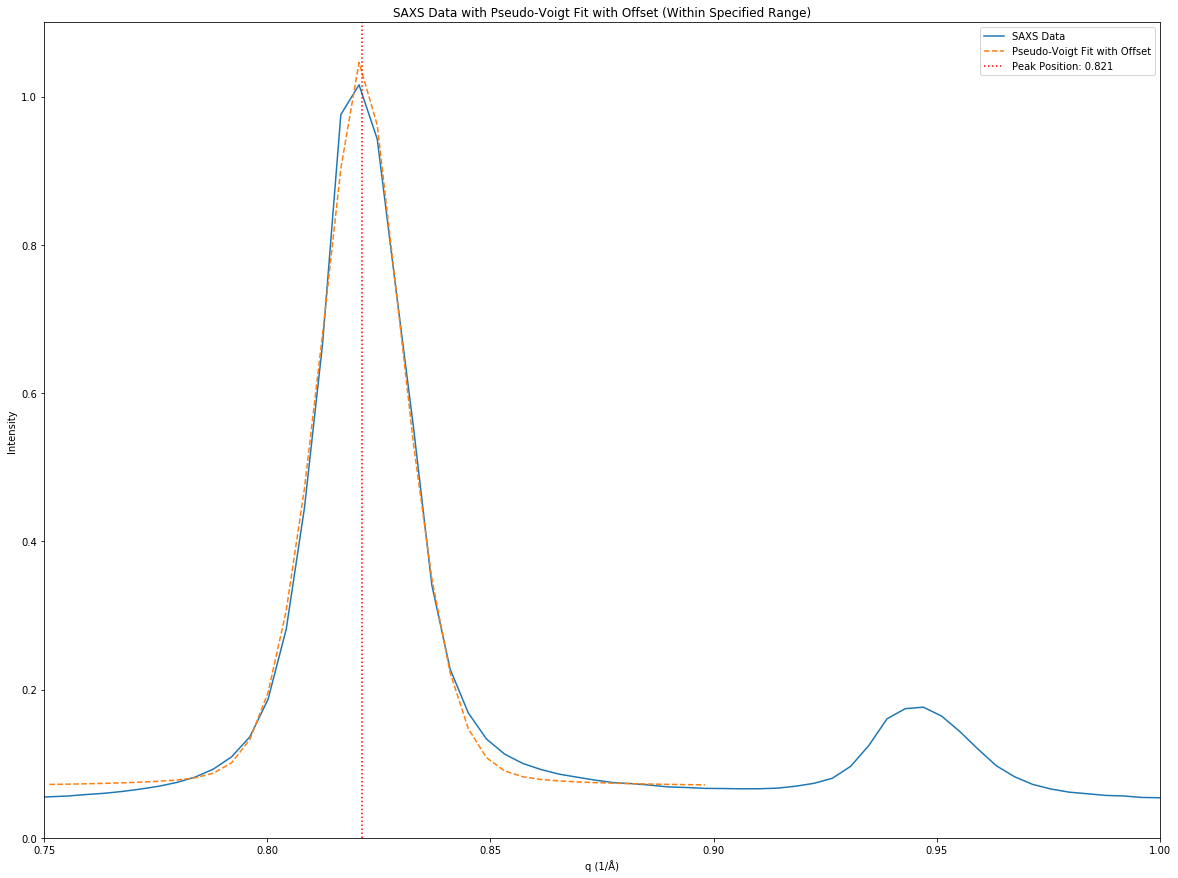

Peak Position: 0.821


In [67]:
from scipy.special import voigt_profile

# Pseudo-Voigt fitting model with y-offset
def pseudo_voigt_with_offset(x, amplitude, center, sigma, fraction, y_offset):
    gaussian_component = (1 - fraction) * np.exp(-((x - center) / sigma)**2)
    lorentzian_component = fraction / ((x - center)**2 + (0.5 * sigma)**2)
    return amplitude * (gaussian_component + lorentzian_component) + y_offset

# Updated fitting function for Pseudo-Voigt with offset
def fit_pseudo_voigt_with_offset(x, y, q_range):
    # Filter the data within the specified q_range
    mask = (x >= q_range[0]) & (x <= q_range[1])
    x_fit, y_fit = x[mask], y[mask]

    # Initial guess for the parameters, including y_offset
    initial_params = [np.max(y_fit), x_fit[np.argmax(y_fit)], 0.1, 0.5, np.min(y_fit)]

    # Perform the curve fitting
    bounds = ([0.01, -np.inf, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, 1])
# amplitude: [0, np.inf] (amplitude should be greater than or equal to 0)
# center: [-np.inf, np.inf] (no bounds on the center)
# sigma: [0, np.inf] (sigma should be greater than or equal to 0)
# fraction: [0, 1] (fraction should be between 0 and 1)
# y_offset: [0, 1] (bounds on the y_offset between 0 and 1)
    params, covariance = curve_fit(pseudo_voigt_with_offset, x_fit, y_fit, p0=initial_params, bounds=bounds)


    # Extract the fitted parameters
    amplitude, center, sigma, fraction, y_offset = params

    # Fitted curve
    fit_curve = pseudo_voigt_with_offset(x_fit, amplitude, center, sigma, fraction, y_offset)

    return center, fit_curve, x_fit

# Example usage with Pseudo-Voigt fit with offset
file_path = 'D:\\ESRF\\sorted\\run04_3B_egy-13224.dat'  # Replace with your file path
q, intensity = read_saxs_dat(file_path)

# Set the range for fitting
q_range_for_fit = (0.75, 0.9)

# Perform Pseudo-Voigt fit with offset within the specified q_range
peak_position, fit_curve, x_fit = fit_pseudo_voigt_with_offset(q, intensity, q_range_for_fit)

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed    

# Plot the original data and the fitted curve within the specified range
plt.plot(q, intensity, label='SAXS Data')
plt.plot(x_fit, fit_curve, label='Pseudo-Voigt Fit with Offset', linestyle='--')
plt.axvline(peak_position, color='red', linestyle=':', label=f'Peak Position: {peak_position:.3f}')
plt.xlabel('q (1/Å)')
plt.ylabel('Intensity')
plt.title('SAXS Data with Pseudo-Voigt Fit with Offset (Within Specified Range)')
plt.xlim(0.75, 1)  # Set X-axis limits to the range from 0.75 to 9
plt.ylim(0, 1.1)  # Set Y-axis limits based on your data range
plt.legend()
plt.show()

print(f"Peak Position: {peak_position:.3f}")